In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

import sys


sys.path.append('../viz')
sys.path.append('../')
sys.path.append('../..')

import optimneuralts
from optimneuralts import Network
import viz_config
from utils import *


saves_path = '../saves'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Cible a predire / prediction effectue x,y plot
exp = "100_rx_100000_combis_10_patterns_42"
dataset = "100_rx_100000_combis_10_patterns_42"
seeds  = [1]

combis, risks, pat_vecs, n_obs, n_dim = load_dataset(dataset, path_to_dataset="../datasets")

thresh = 2
# Define true solution
combis_in_sol = torch.where(risks > thresh)[0]
true_sol = combis[combis_in_sol]
true_sol_risks = risks[combis_in_sol]
n_combis_in_sol = len(combis_in_sol)

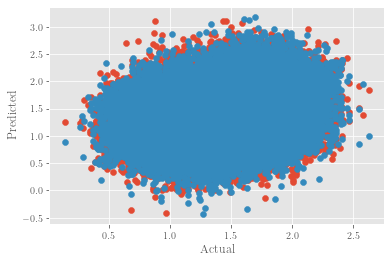

In [20]:
for seed in seeds:
    model = torch.load(f"{saves_path}/{exp}/agents/{seed}.pth")
    preds = model.net(combis).detach().cpu().numpy()
    risks = risks.cpu().numpy()
    plt.scatter(risks, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

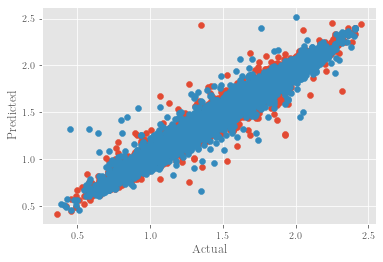

In [21]:
for seed in seeds:
    model = torch.load(f"{saves_path}/{exp}/agents/{seed}.pth")
    played_preds = model.net(model.vec_history).detach().cpu().numpy()
    played_risks = model.reward_history.cpu().numpy()
    plt.scatter(played_risks, played_preds)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()




In [5]:
for seed in seeds:
    model = torch.load(f"{saves_path}/{exp}/agents/{seed}.pth")
    true_sol_preds = model.net(true_sol).detach().cpu().numpy()
    true_sol_risks = true_sol_risks.cpu().numpy()
    plt.scatter(true_sol_risks, true_sol_preds)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

AttributeError: Can't get attribute 'Network' on <module 'utils' from '/home/quo/Documents/Maitrise/optimneuralbandits/testing/debug/../utils.py'>